# Assumed Sensor Accuracies are Over-/Under-estimated

A subset of robots' initial estimate of the sensor accuracy is either over- or under-estimated when compared to the actual accuracy. Only that subset of robots run the sensor filter.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import static_degradation_viz_module as sdvm

In [2]:
# Define colors for plots
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "dodgerblue", "mediumturquoise",]

"""
    Only flawed robots are plotted
"""

# Define common plotting function
def plot_data(json_data_lst, tfr, fig_title):

    num_flawed_robots = 0

    # Display parameter values
    print("Common parameter values:\n")

    # Plot time series
    fig1, ax1 = plt.subplots(2, 3, figsize=(14, 8))
    for i, json_data_obj in enumerate(json_data_lst):
        num_flawed_robot_lst = sorted(json_data_obj.num_flawed_robots, reverse=True)

        json_data_obj.print_common_data()
        print("\n")

        # Plot correct target fill ratio value
        ax1[0, i].axhline(tfr, color="black", linestyle="--")

        # Plot correct sensor accuracy value
        ax1[1, i].axhline(json_data_obj.correct_sensor_acc_b, color="black", linestyle="--")

        for j, num in enumerate(num_flawed_robot_lst):

            # Plot all the robots if every one of them has the filter running
            if json_data_obj.correct_robot_filter: num_flawed_robots = json_data_obj.num_robots
            else: num_flawed_robots = num

            for trial_ind in range(json_data_obj.num_trials):

                # Plot informed estimate
                [
                    ax1[0, i].plot(
                        np.arange(0, json_data_obj.num_steps+1),
                        json_data_obj.data[num][trial_ind, -k, :, 0].flatten(),
                        c=colors[len(num_flawed_robot_lst)-j-1], # colors differentiate the number of flawed robots
                        lw=(3-j*0.4)
                    ) for k in range(1, num_flawed_robots+1)
                ]

                # Plot sensor estimate
                [
                    ax1[1, i].plot(
                        np.arange(0, json_data_obj.num_steps+1),
                        json_data_obj.data[num][trial_ind, -k, :, 1].flatten(),
                        c=colors[len(num_flawed_robot_lst)-j-1], # colors differentiate the number of flawed robots
                        lw=(3-j*0.4)
                    ) for k in range(1, num_flawed_robots+1)
                ]

        # Set title and labels
        ax1[0, i].set_title(
            "$w^* = {0}, \hat{{w}}_0 = {1}, \Delta w_0 = {2}$".format(
                json_data_obj.correct_sensor_acc_b,
                json_data_obj.flawed_sensor_acc_b,
                np.round(json_data_obj.flawed_sensor_acc_b - json_data_obj.correct_sensor_acc_b, 2)
            )
        )
        ax1[0, i].set_ylabel("$x$")
        ax1[1, i].set_ylabel("$\hat{w}$")
        ax1[1, i].set_xlabel("Observation rounds")

        # Set limits
        ax1[0, i].set_ylim([-0.01, 1.01])
        ax1[1, i].set_ylim([-0.01, 1.01])

        # Set grids
        ax1[0, i].grid()
        ax1[1, i].grid()


    labels = ["{0}".format(i) for i in num_flawed_robot_lst]
    handles = [mlines.Line2D([], [], color=colors[len(labels)-i-1], linestyle="-", markersize=10, label=lab) for i, lab in enumerate(labels)]
    fig1.legend(handles, labels, title="# flawed robots", loc="center left", bbox_to_anchor=(1, 0.5))

    fig1.suptitle(fig_title)

    plt.tight_layout()

## Case 1: Correct Robots Do Not Update Their Sensor Accuracies

Robots with the correct assumed sensor accuracy (_i.e.,_ the non-flawed robots) do not run the sensor filter.

In [3]:
# Correct assumed accuracy paths
case1_under_paths = [
    "../data/040924_144031_t3_s10000_tfr550_flw1-1-5_flwb550_flww550_corb750_corw750_commsp10_filtp1000",
    "../data/040924_144314_t3_s10000_tfr750_flw1-1-5_flwb550_flww550_corb750_corw750_commsp10_filtp1000",
    "../data/040924_144546_t3_s10000_tfr950_flw1-1-5_flwb550_flww550_corb750_corw750_commsp10_filtp1000",
    "../data/040924_144842_t3_s10000_tfr550_flw1-1-5_flwb550_flww550_corb950_corw950_commsp10_filtp1000",
    "../data/040924_145113_t3_s10000_tfr750_flw1-1-5_flwb550_flww550_corb950_corw950_commsp10_filtp1000",
    "../data/040924_145341_t3_s10000_tfr950_flw1-1-5_flwb550_flww550_corb950_corw950_commsp10_filtp1000",
    "../data/040924_151248_t3_s10000_tfr550_flw1-1-5_flwb750_flww750_corb950_corw950_commsp10_filtp1000",
    "../data/040924_151525_t3_s10000_tfr750_flw1-1-5_flwb750_flww750_corb950_corw950_commsp10_filtp1000",
    "../data/040924_151803_t3_s10000_tfr950_flw1-1-5_flwb750_flww750_corb950_corw950_commsp10_filtp1000"
]

case2_over_paths = [
    "../data/040924_145626_t3_s10000_tfr550_flw1-1-5_flwb750_flww750_corb550_corw550_commsp10_filtp1000",
    "../data/040924_145911_t3_s10000_tfr750_flw1-1-5_flwb750_flww750_corb550_corw550_commsp10_filtp1000",
    "../data/040924_150201_t3_s10000_tfr950_flw1-1-5_flwb750_flww750_corb550_corw550_commsp10_filtp1000",
    "../data/040924_152050_t3_s10000_tfr550_flw1-1-5_flwb950_flww950_corb550_corw550_commsp10_filtp1000",
    "../data/040924_152337_t3_s10000_tfr750_flw1-1-5_flwb950_flww950_corb550_corw550_commsp10_filtp1000",
    "../data/040924_152620_t3_s10000_tfr950_flw1-1-5_flwb950_flww950_corb550_corw550_commsp10_filtp1000",
    "../data/040924_152908_t3_s10000_tfr550_flw1-1-5_flwb950_flww950_corb750_corw750_commsp10_filtp1000",
    "../data/040924_153156_t3_s10000_tfr750_flw1-1-5_flwb950_flww950_corb750_corw750_commsp10_filtp1000",
    "../data/040924_153434_t3_s10000_tfr950_flw1-1-5_flwb950_flww950_corb750_corw750_commsp10_filtp1000"
]

case1_under_tfr550_paths = [
    "../data/040924_144031_t3_s10000_tfr550_flw1-1-5_flwb550_flww550_corb750_corw750_commsp10_filtp1000",
    "../data/040924_144842_t3_s10000_tfr550_flw1-1-5_flwb550_flww550_corb950_corw950_commsp10_filtp1000",
    "../data/040924_151248_t3_s10000_tfr550_flw1-1-5_flwb750_flww750_corb950_corw950_commsp10_filtp1000"
]
case1_under_tfr750_paths = [
    "../data/040924_144314_t3_s10000_tfr750_flw1-1-5_flwb550_flww550_corb750_corw750_commsp10_filtp1000",
    "../data/040924_145113_t3_s10000_tfr750_flw1-1-5_flwb550_flww550_corb950_corw950_commsp10_filtp1000",
    "../data/040924_151525_t3_s10000_tfr750_flw1-1-5_flwb750_flww750_corb950_corw950_commsp10_filtp1000"
]
case1_under_tfr950_paths = [
    "../data/040924_144546_t3_s10000_tfr950_flw1-1-5_flwb550_flww550_corb750_corw750_commsp10_filtp1000",
    "../data/040924_145341_t3_s10000_tfr950_flw1-1-5_flwb550_flww550_corb950_corw950_commsp10_filtp1000",
    "../data/040924_151803_t3_s10000_tfr950_flw1-1-5_flwb750_flww750_corb950_corw950_commsp10_filtp1000"
]

case1_over_tfr550_paths = [
    "../data/040924_145626_t3_s10000_tfr550_flw1-1-5_flwb750_flww750_corb550_corw550_commsp10_filtp1000",
    "../data/040924_152050_t3_s10000_tfr550_flw1-1-5_flwb950_flww950_corb550_corw550_commsp10_filtp1000",
    "../data/040924_152908_t3_s10000_tfr550_flw1-1-5_flwb950_flww950_corb750_corw750_commsp10_filtp1000"
]
case1_over_tfr750_paths = [
    "../data/040924_145911_t3_s10000_tfr750_flw1-1-5_flwb750_flww750_corb550_corw550_commsp10_filtp1000",
    "../data/040924_152337_t3_s10000_tfr750_flw1-1-5_flwb950_flww950_corb550_corw550_commsp10_filtp1000",
    "../data/040924_153156_t3_s10000_tfr750_flw1-1-5_flwb950_flww950_corb750_corw750_commsp10_filtp1000"
]
case1_over_tfr950_paths = [
    "../data/040924_150201_t3_s10000_tfr950_flw1-1-5_flwb750_flww750_corb550_corw550_commsp10_filtp1000",
    "../data/040924_152620_t3_s10000_tfr950_flw1-1-5_flwb950_flww950_corb550_corw550_commsp10_filtp1000",
    "../data/040924_153434_t3_s10000_tfr950_flw1-1-5_flwb950_flww950_corb750_corw750_commsp10_filtp1000"
]

# Load data
case1_under_tfr550_json_data = [sdvm.StaticDegradationJsonData(p) for p in case1_under_tfr550_paths]
case1_under_tfr750_json_data = [sdvm.StaticDegradationJsonData(p) for p in case1_under_tfr750_paths]
case1_under_tfr950_json_data = [sdvm.StaticDegradationJsonData(p) for p in case1_under_tfr950_paths]

case1_over_tfr550_json_data = [sdvm.StaticDegradationJsonData(p) for p in case1_over_tfr550_paths]
case1_over_tfr750_json_data = [sdvm.StaticDegradationJsonData(p) for p in case1_over_tfr750_paths]
case1_over_tfr950_json_data = [sdvm.StaticDegradationJsonData(p) for p in case1_over_tfr950_paths]

### Case 1a: Underestimated Initial Accuracy

Robots' assumed initial accuracy is underestimated.

Common parameter values:

num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.55
flawed_sensor_acc_b: 0.55
flawed_sensor_acc_w: 0.55
correct_sensor_acc_b: 0.75
correct_sensor_acc_w: 0.75
fully_connected: True
correct_robot_filter: False


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.55
flawed_sensor_acc_b: 0.55
flawed_sensor_acc_w: 0.55
correct_sensor_acc_b: 0.95
correct_sensor_acc_w: 0.95
fully_connected: True
correct_robot_filter: False


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.55
flawed_sensor_acc_b: 0.75
flawed_sensor_acc_w: 0.75
correct_sensor_acc_b: 0.95
correct_sensor_acc_w: 0.95
fully_connected: True
correct_robot_filter: False




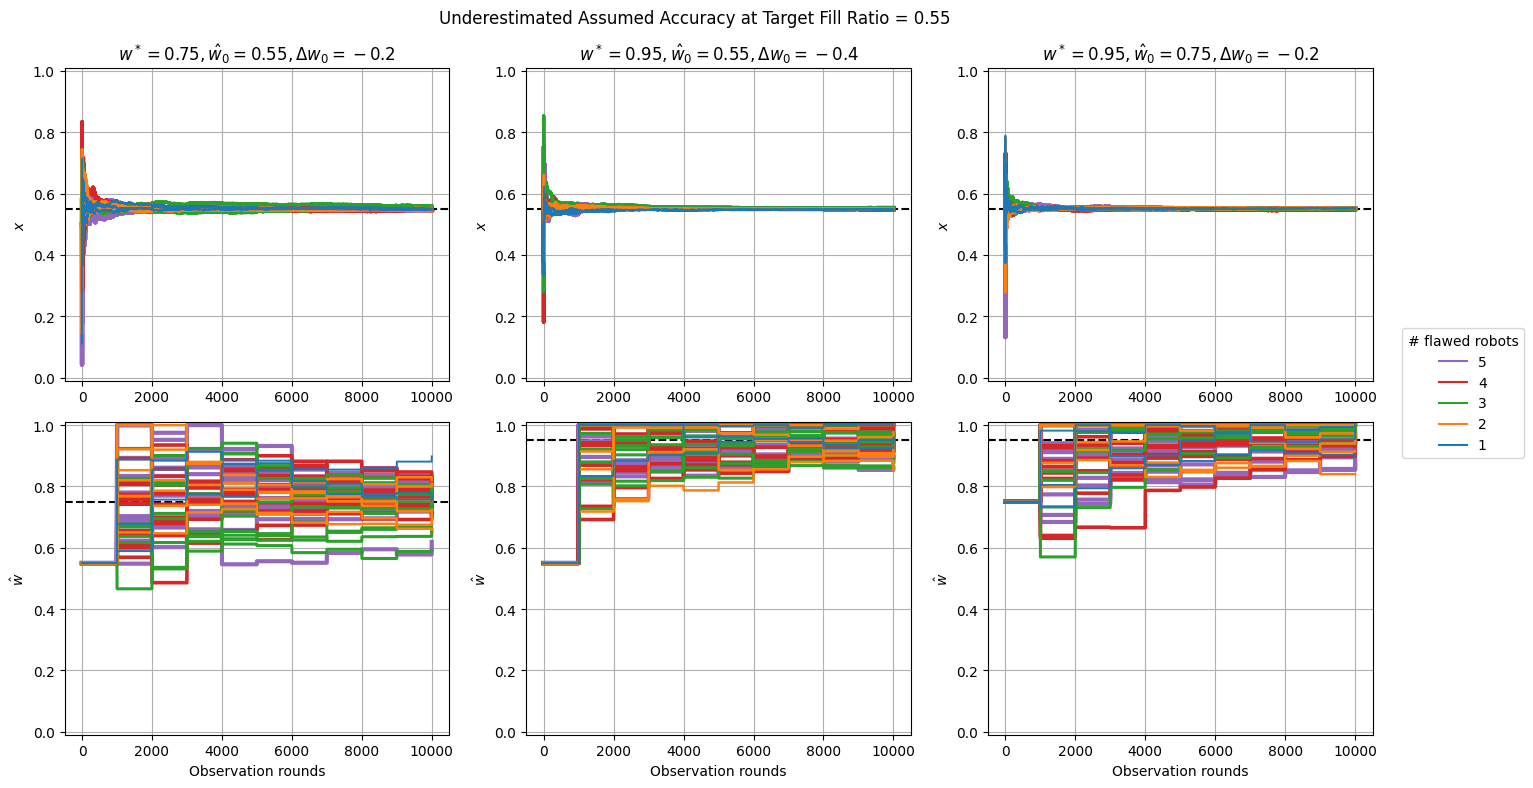

In [4]:
tfr = 0.55
plot_data(case1_under_tfr550_json_data, tfr, "Underestimated Assumed Accuracy at Target Fill Ratio = {0}".format(tfr))

Common parameter values:

num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.75
flawed_sensor_acc_b: 0.55
flawed_sensor_acc_w: 0.55
correct_sensor_acc_b: 0.75
correct_sensor_acc_w: 0.75
fully_connected: True
correct_robot_filter: False


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.75
flawed_sensor_acc_b: 0.55
flawed_sensor_acc_w: 0.55
correct_sensor_acc_b: 0.95
correct_sensor_acc_w: 0.95
fully_connected: True
correct_robot_filter: False


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.75
flawed_sensor_acc_b: 0.75
flawed_sensor_acc_w: 0.75
correct_sensor_acc_b: 0.95
correct_sensor_acc_w: 0.95
fully_connected: True
correct_robot_filter: False




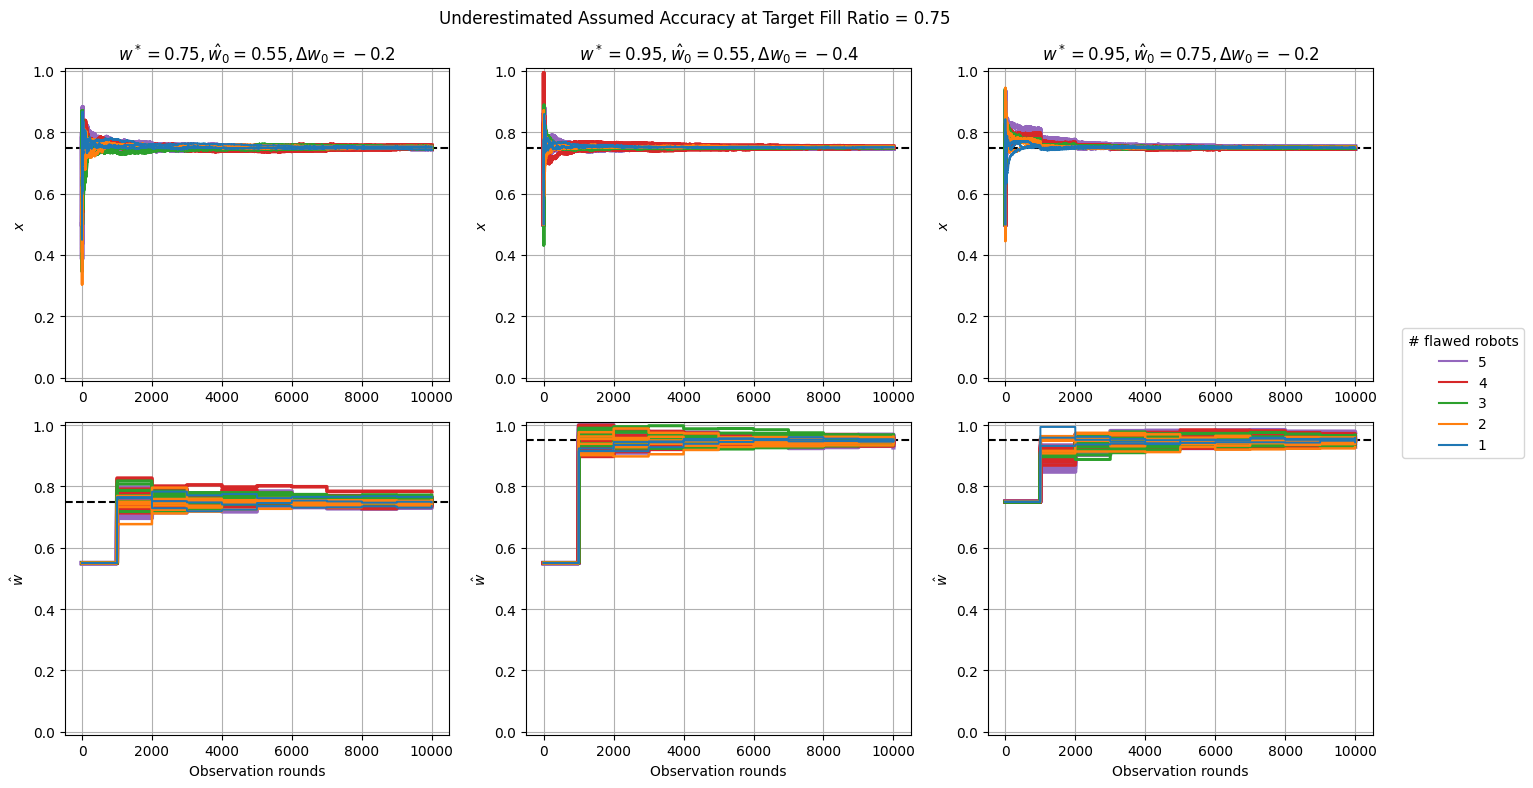

In [5]:
tfr = 0.75
plot_data(case1_under_tfr750_json_data, tfr, "Underestimated Assumed Accuracy at Target Fill Ratio = {0}".format(tfr))

Common parameter values:

num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.95
flawed_sensor_acc_b: 0.55
flawed_sensor_acc_w: 0.55
correct_sensor_acc_b: 0.75
correct_sensor_acc_w: 0.75
fully_connected: True
correct_robot_filter: False


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.95
flawed_sensor_acc_b: 0.55
flawed_sensor_acc_w: 0.55
correct_sensor_acc_b: 0.95
correct_sensor_acc_w: 0.95
fully_connected: True
correct_robot_filter: False


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.95
flawed_sensor_acc_b: 0.75
flawed_sensor_acc_w: 0.75
correct_sensor_acc_b: 0.95
correct_sensor_acc_w: 0.95
fully_connected: True
correct_robot_filter: False




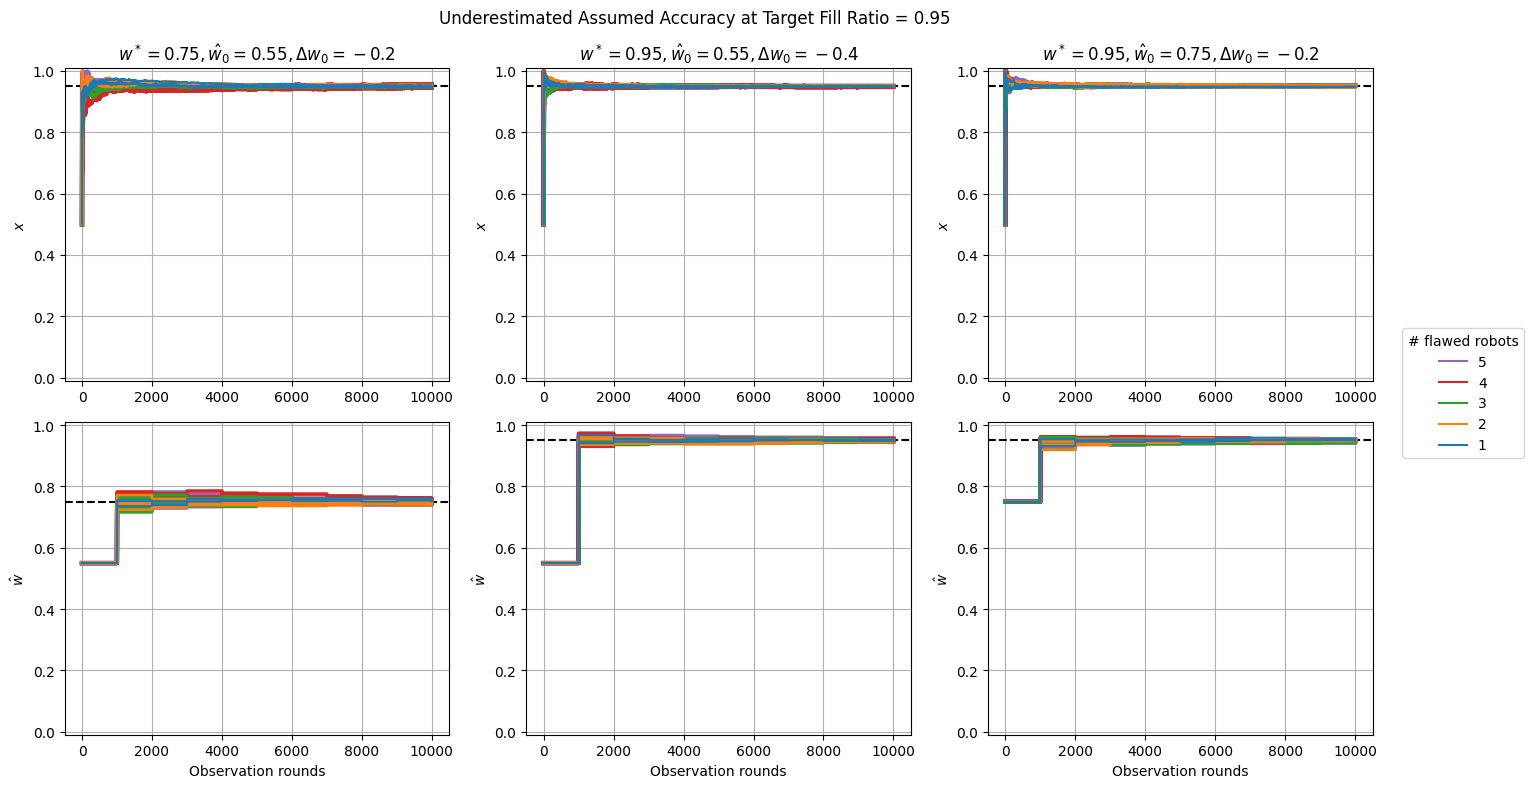

In [6]:
tfr = 0.95
plot_data(case1_under_tfr950_json_data, tfr, "Underestimated Assumed Accuracy at Target Fill Ratio = {0}".format(tfr))

### Case 1b: Overestimated Initial Accuracy

Robots' assumed initial accuracy is overestimated.

Common parameter values:

num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.55
flawed_sensor_acc_b: 0.75
flawed_sensor_acc_w: 0.75
correct_sensor_acc_b: 0.55
correct_sensor_acc_w: 0.55
fully_connected: True
correct_robot_filter: False


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.55
flawed_sensor_acc_b: 0.95
flawed_sensor_acc_w: 0.95
correct_sensor_acc_b: 0.55
correct_sensor_acc_w: 0.55
fully_connected: True
correct_robot_filter: False


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.55
flawed_sensor_acc_b: 0.95
flawed_sensor_acc_w: 0.95
correct_sensor_acc_b: 0.75
correct_sensor_acc_w: 0.75
fully_connected: True
correct_robot_filter: False




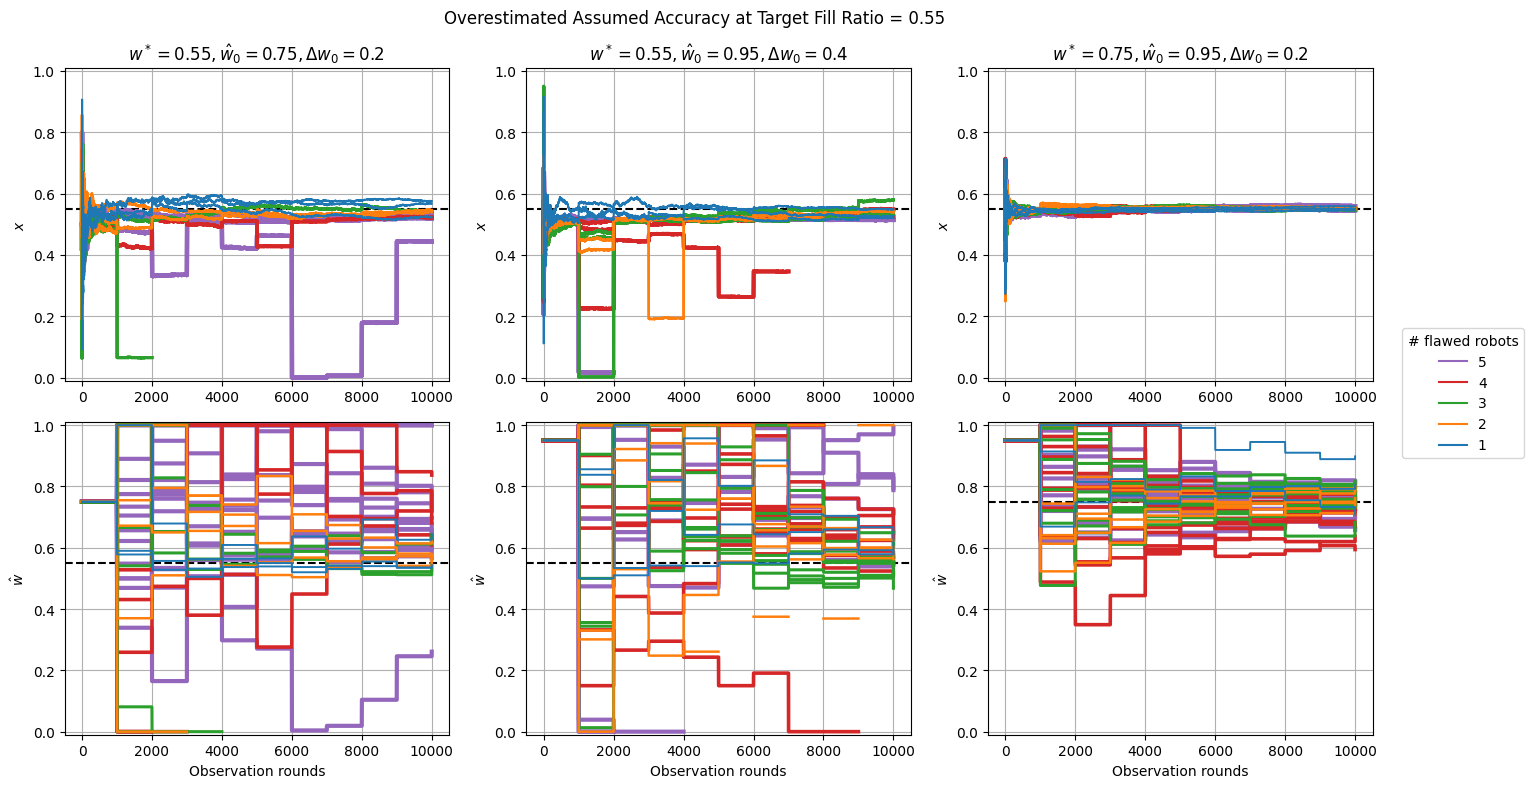

In [7]:
tfr = 0.55
plot_data(case1_over_tfr550_json_data, tfr, "Overestimated Assumed Accuracy at Target Fill Ratio = {0}".format(tfr))

Common parameter values:

num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.75
flawed_sensor_acc_b: 0.75
flawed_sensor_acc_w: 0.75
correct_sensor_acc_b: 0.55
correct_sensor_acc_w: 0.55
fully_connected: True
correct_robot_filter: False


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.75
flawed_sensor_acc_b: 0.95
flawed_sensor_acc_w: 0.95
correct_sensor_acc_b: 0.55
correct_sensor_acc_w: 0.55
fully_connected: True
correct_robot_filter: False


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.75
flawed_sensor_acc_b: 0.95
flawed_sensor_acc_w: 0.95
correct_sensor_acc_b: 0.75
correct_sensor_acc_w: 0.75
fully_connected: True
correct_robot_filter: False




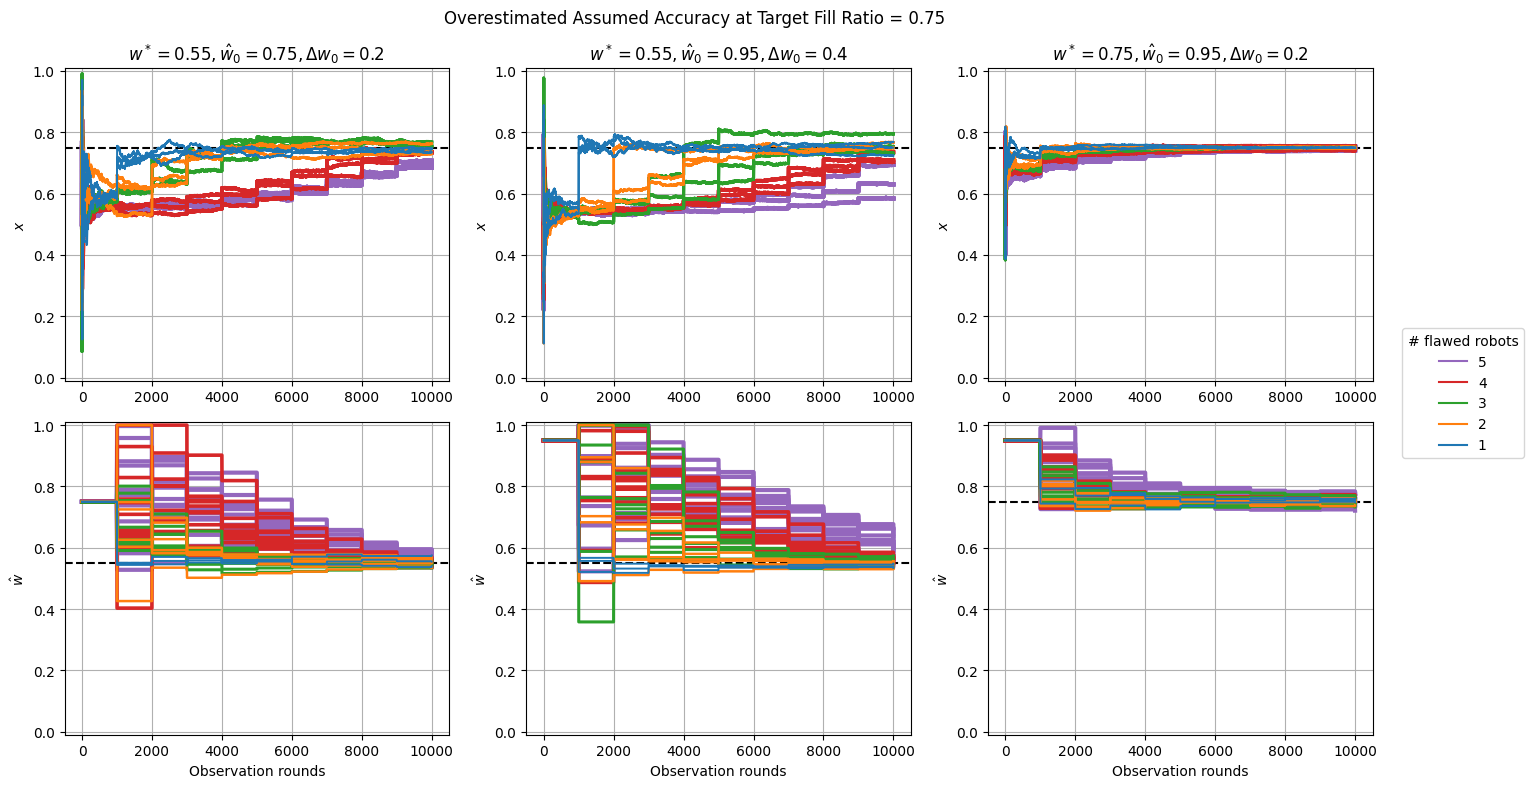

In [8]:
tfr = 0.75
plot_data(case1_over_tfr750_json_data, tfr, "Overestimated Assumed Accuracy at Target Fill Ratio = {0}".format(tfr))

Common parameter values:

num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.95
flawed_sensor_acc_b: 0.75
flawed_sensor_acc_w: 0.75
correct_sensor_acc_b: 0.55
correct_sensor_acc_w: 0.55
fully_connected: True
correct_robot_filter: False


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.95
flawed_sensor_acc_b: 0.95
flawed_sensor_acc_w: 0.95
correct_sensor_acc_b: 0.55
correct_sensor_acc_w: 0.55
fully_connected: True
correct_robot_filter: False


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.95
flawed_sensor_acc_b: 0.95
flawed_sensor_acc_w: 0.95
correct_sensor_acc_b: 0.75
correct_sensor_acc_w: 0.75
fully_connected: True
correct_robot_filter: False




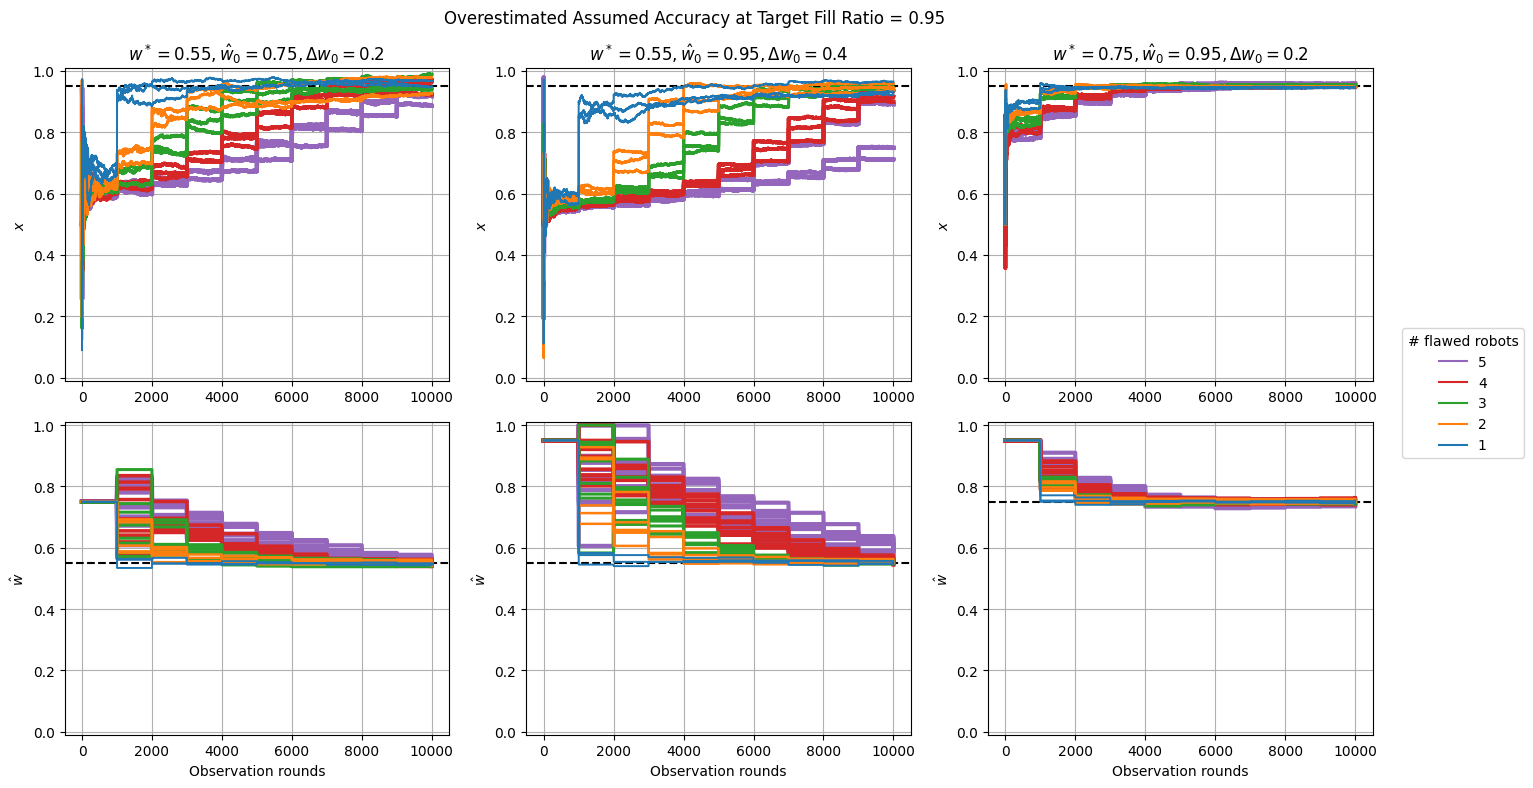

In [9]:
tfr = 0.95
plot_data(case1_over_tfr950_json_data, tfr, "Overestimated Assumed Accuracy at Target Fill Ratio = {0}".format(tfr))

## Case 2: Correct Robots Update Their Sensor Accuracies

Robots with the correct assumed sensor accuracy (_i.e.,_ the non-flawed robots) run the sensor filter. This means that their assumed accuracies may deviate from the true accuracy at a later time.

In [10]:
case2_under_paths = [
    "../data/041024_170010_t3_s10000_tfr550_flw1-1-5_flwb550_flww550_corb750_corw750_commsp10_filtp1000",
    "../data/041024_170244_t3_s10000_tfr750_flw1-1-5_flwb550_flww550_corb750_corw750_commsp10_filtp1000",
    "../data/041024_170515_t3_s10000_tfr950_flw1-1-5_flwb550_flww550_corb750_corw750_commsp10_filtp1000",
    "../data/041024_170745_t3_s10000_tfr550_flw1-1-5_flwb550_flww550_corb950_corw950_commsp10_filtp1000",
    "../data/041024_171013_t3_s10000_tfr750_flw1-1-5_flwb550_flww550_corb950_corw950_commsp10_filtp1000",
    "../data/041024_171259_t3_s10000_tfr950_flw1-1-5_flwb550_flww550_corb950_corw950_commsp10_filtp1000",
    "../data/041024_172306_t3_s10000_tfr550_flw1-1-5_flwb750_flww750_corb950_corw950_commsp10_filtp1000",
    "../data/041024_172619_t3_s10000_tfr750_flw1-1-5_flwb750_flww750_corb950_corw950_commsp10_filtp1000",
    "../data/041024_172951_t3_s10000_tfr950_flw1-1-5_flwb750_flww750_corb950_corw950_commsp10_filtp1000"
]

case2_over_paths = [
    "../data/041024_171533_t3_s10000_tfr550_flw1-1-5_flwb750_flww750_corb550_corw550_commsp10_filtp1000",
    "../data/041024_171806_t3_s10000_tfr750_flw1-1-5_flwb750_flww750_corb550_corw550_commsp10_filtp1000",
    "../data/041024_172033_t3_s10000_tfr950_flw1-1-5_flwb750_flww750_corb550_corw550_commsp10_filtp1000",
    "../data/041024_173313_t3_s10000_tfr550_flw1-1-5_flwb950_flww950_corb550_corw550_commsp10_filtp1000",
    "../data/041024_173559_t3_s10000_tfr750_flw1-1-5_flwb950_flww950_corb550_corw550_commsp10_filtp1000",
    "../data/041024_173833_t3_s10000_tfr950_flw1-1-5_flwb950_flww950_corb550_corw550_commsp10_filtp1000",
    "../data/041024_174110_t3_s10000_tfr550_flw1-1-5_flwb950_flww950_corb750_corw750_commsp10_filtp1000",
    "../data/041024_174348_t3_s10000_tfr750_flw1-1-5_flwb950_flww950_corb750_corw750_commsp10_filtp1000",
    "../data/041024_174624_t3_s10000_tfr950_flw1-1-5_flwb950_flww950_corb750_corw750_commsp10_filtp1000"
]

case2_under_tfr550_paths = [
    "../data/041024_170010_t3_s10000_tfr550_flw1-1-5_flwb550_flww550_corb750_corw750_commsp10_filtp1000",
    "../data/041024_170745_t3_s10000_tfr550_flw1-1-5_flwb550_flww550_corb950_corw950_commsp10_filtp1000",
    "../data/041024_172306_t3_s10000_tfr550_flw1-1-5_flwb750_flww750_corb950_corw950_commsp10_filtp1000"
]
case2_under_tfr750_paths = [
    "../data/041024_170244_t3_s10000_tfr750_flw1-1-5_flwb550_flww550_corb750_corw750_commsp10_filtp1000",
    "../data/041024_171013_t3_s10000_tfr750_flw1-1-5_flwb550_flww550_corb950_corw950_commsp10_filtp1000",
    "../data/041024_172619_t3_s10000_tfr750_flw1-1-5_flwb750_flww750_corb950_corw950_commsp10_filtp1000"
]
case2_under_tfr950_paths = [
    "../data/041024_170515_t3_s10000_tfr950_flw1-1-5_flwb550_flww550_corb750_corw750_commsp10_filtp1000",
    "../data/041024_171259_t3_s10000_tfr950_flw1-1-5_flwb550_flww550_corb950_corw950_commsp10_filtp1000",
    "../data/041024_172951_t3_s10000_tfr950_flw1-1-5_flwb750_flww750_corb950_corw950_commsp10_filtp1000"
]

case2_over_tfr550_paths = [
    "../data/041024_171533_t3_s10000_tfr550_flw1-1-5_flwb750_flww750_corb550_corw550_commsp10_filtp1000",
    "../data/041024_173313_t3_s10000_tfr550_flw1-1-5_flwb950_flww950_corb550_corw550_commsp10_filtp1000",
    "../data/041024_174110_t3_s10000_tfr550_flw1-1-5_flwb950_flww950_corb750_corw750_commsp10_filtp1000"
]
case2_over_tfr750_paths = [
    "../data/041024_171806_t3_s10000_tfr750_flw1-1-5_flwb750_flww750_corb550_corw550_commsp10_filtp1000",
    "../data/041024_173559_t3_s10000_tfr750_flw1-1-5_flwb950_flww950_corb550_corw550_commsp10_filtp1000",
    "../data/041024_174348_t3_s10000_tfr750_flw1-1-5_flwb950_flww950_corb750_corw750_commsp10_filtp1000"
]
case2_over_tfr950_paths = [
    "../data/041024_172033_t3_s10000_tfr950_flw1-1-5_flwb750_flww750_corb550_corw550_commsp10_filtp1000",
    "../data/041024_173833_t3_s10000_tfr950_flw1-1-5_flwb950_flww950_corb550_corw550_commsp10_filtp1000",
    "../data/041024_174624_t3_s10000_tfr950_flw1-1-5_flwb950_flww950_corb750_corw750_commsp10_filtp1000"
]

# Load data
case2_under_tfr550_json_data = [sdvm.StaticDegradationJsonData(p) for p in case2_under_tfr550_paths]
case2_under_tfr750_json_data = [sdvm.StaticDegradationJsonData(p) for p in case2_under_tfr750_paths]
case2_under_tfr950_json_data = [sdvm.StaticDegradationJsonData(p) for p in case2_under_tfr950_paths]

case2_over_tfr550_json_data = [sdvm.StaticDegradationJsonData(p) for p in case2_over_tfr550_paths]
case2_over_tfr750_json_data = [sdvm.StaticDegradationJsonData(p) for p in case2_over_tfr750_paths]
case2_over_tfr950_json_data = [sdvm.StaticDegradationJsonData(p) for p in case2_over_tfr950_paths]

### Case 2a: Underestimated Initial Accuracy

Robots' assumed initial accuracy is underestimated.

Common parameter values:

num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.55
flawed_sensor_acc_b: 0.55
flawed_sensor_acc_w: 0.55
correct_sensor_acc_b: 0.75
correct_sensor_acc_w: 0.75
fully_connected: True
correct_robot_filter: True


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.55
flawed_sensor_acc_b: 0.55
flawed_sensor_acc_w: 0.55
correct_sensor_acc_b: 0.95
correct_sensor_acc_w: 0.95
fully_connected: True
correct_robot_filter: True


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.55
flawed_sensor_acc_b: 0.75
flawed_sensor_acc_w: 0.75
correct_sensor_acc_b: 0.95
correct_sensor_acc_w: 0.95
fully_connected: True
correct_robot_filter: True




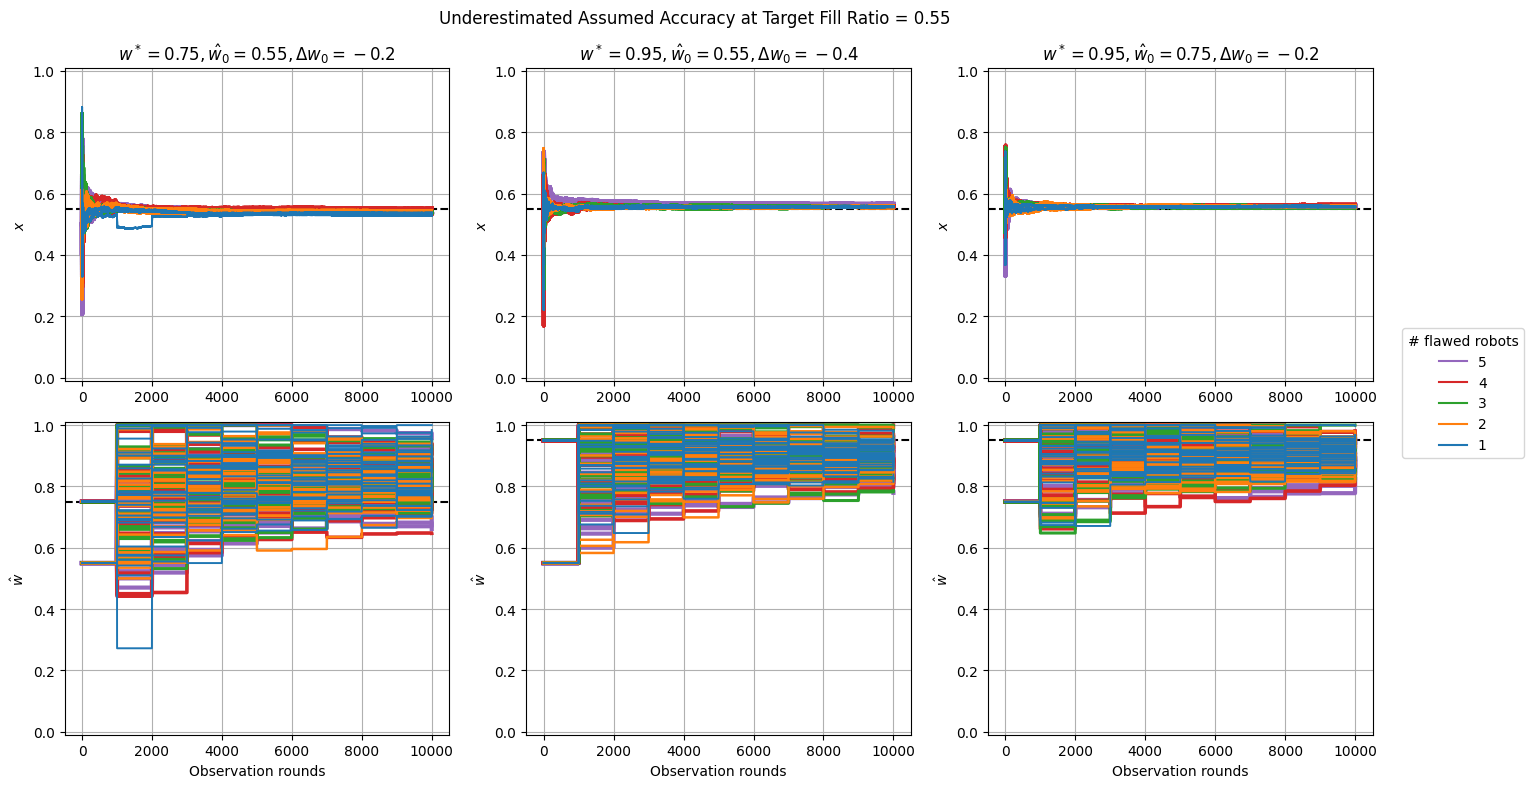

In [11]:
tfr = 0.55
plot_data(case2_under_tfr550_json_data, tfr, "Underestimated Assumed Accuracy at Target Fill Ratio = {0}".format(tfr))

Common parameter values:

num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.75
flawed_sensor_acc_b: 0.55
flawed_sensor_acc_w: 0.55
correct_sensor_acc_b: 0.75
correct_sensor_acc_w: 0.75
fully_connected: True
correct_robot_filter: True


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.75
flawed_sensor_acc_b: 0.55
flawed_sensor_acc_w: 0.55
correct_sensor_acc_b: 0.95
correct_sensor_acc_w: 0.95
fully_connected: True
correct_robot_filter: True


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.75
flawed_sensor_acc_b: 0.75
flawed_sensor_acc_w: 0.75
correct_sensor_acc_b: 0.95
correct_sensor_acc_w: 0.95
fully_connected: True
correct_robot_filter: True




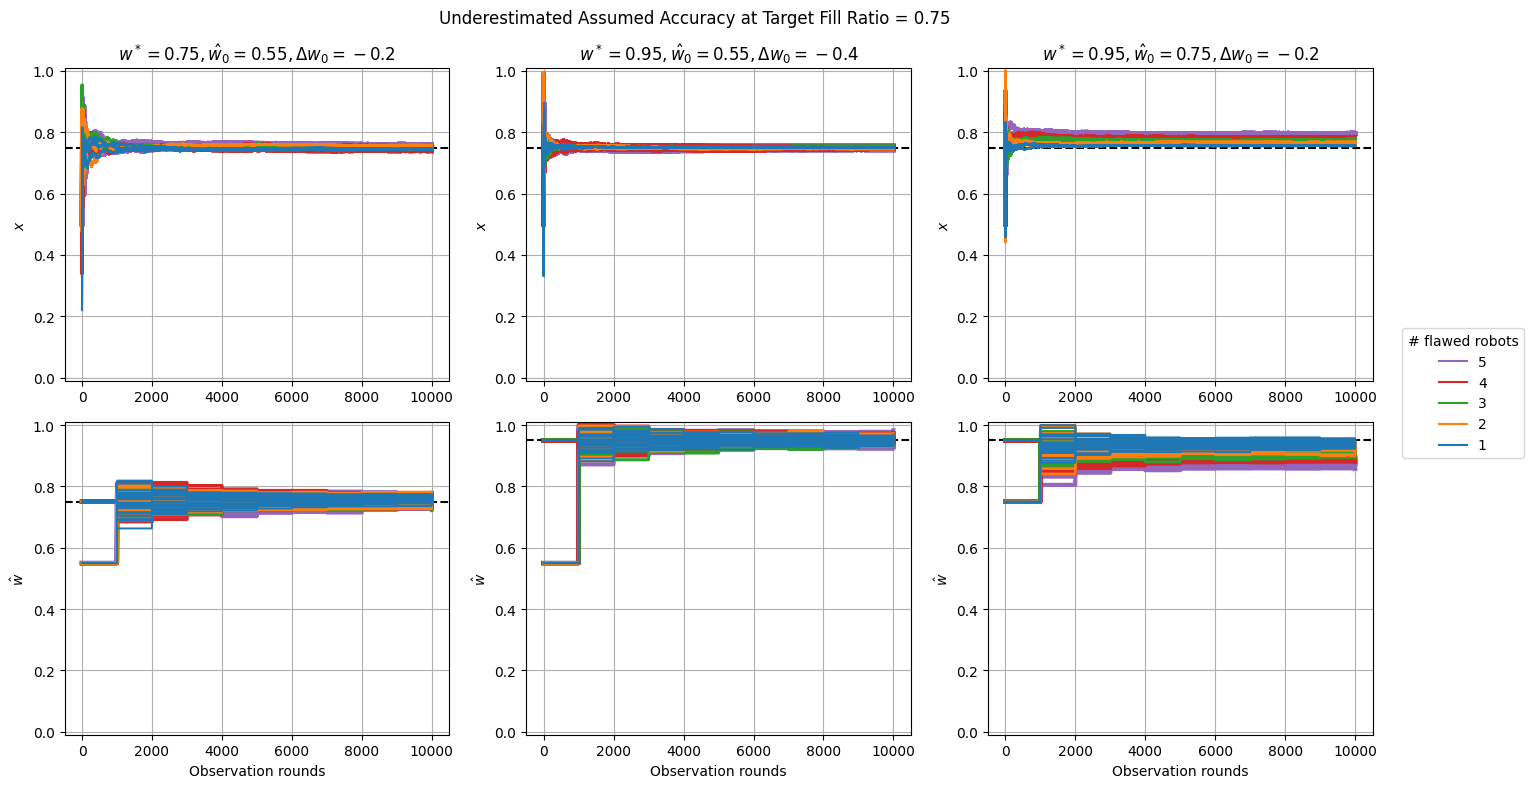

In [12]:
tfr = 0.75
plot_data(case2_under_tfr750_json_data, tfr, "Underestimated Assumed Accuracy at Target Fill Ratio = {0}".format(tfr))

Common parameter values:

num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.95
flawed_sensor_acc_b: 0.55
flawed_sensor_acc_w: 0.55
correct_sensor_acc_b: 0.75
correct_sensor_acc_w: 0.75
fully_connected: True
correct_robot_filter: True


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.95
flawed_sensor_acc_b: 0.55
flawed_sensor_acc_w: 0.55
correct_sensor_acc_b: 0.95
correct_sensor_acc_w: 0.95
fully_connected: True
correct_robot_filter: True


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.95
flawed_sensor_acc_b: 0.75
flawed_sensor_acc_w: 0.75
correct_sensor_acc_b: 0.95
correct_sensor_acc_w: 0.95
fully_connected: True
correct_robot_filter: True




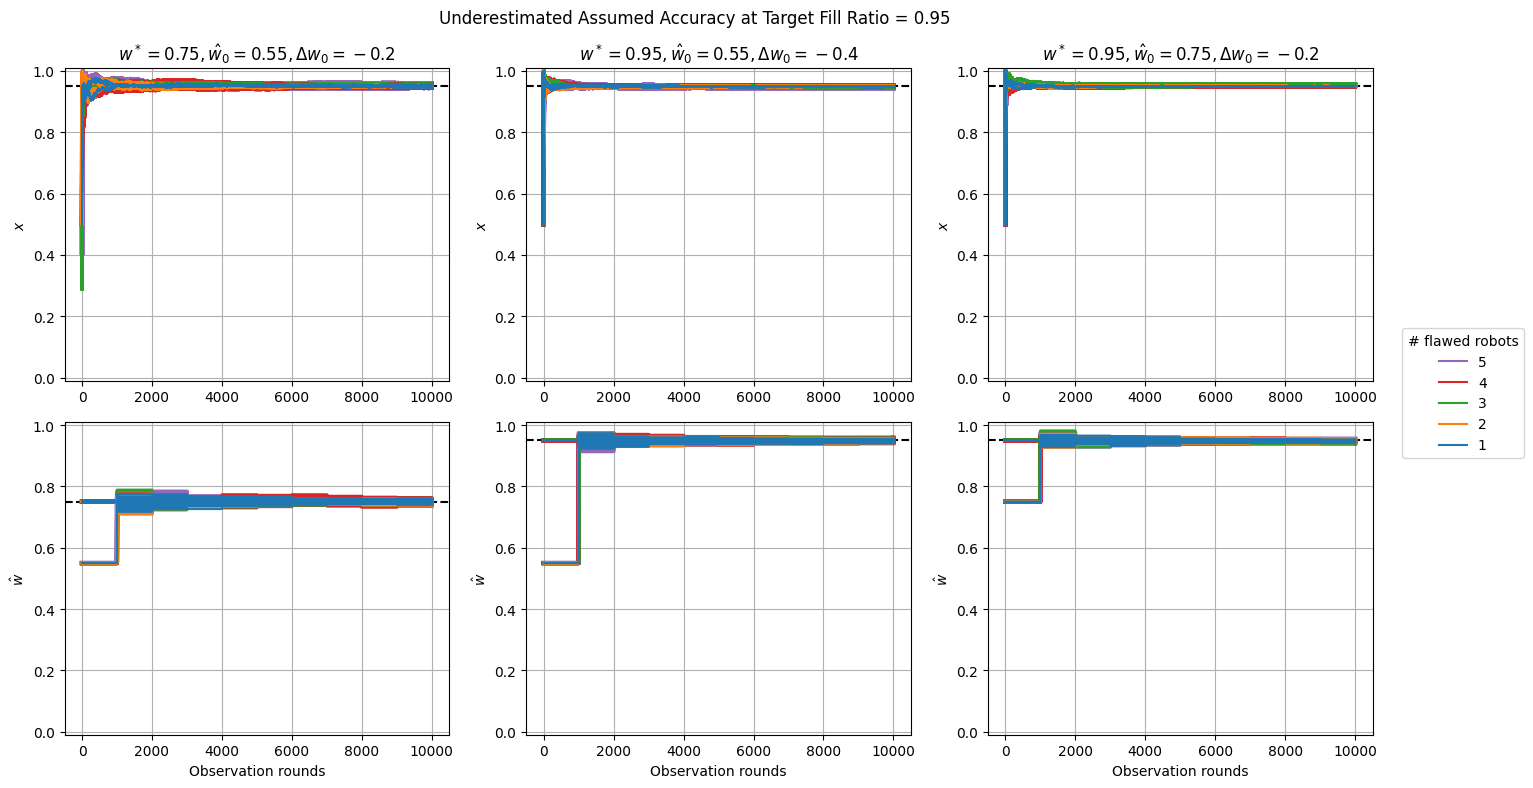

In [13]:
tfr = 0.95
plot_data(case2_under_tfr950_json_data, tfr, "Underestimated Assumed Accuracy at Target Fill Ratio = {0}".format(tfr))

### Case 2b: Overestimated Initial Accuracy

Robots' assumed initial accuracy is underestimated.

Common parameter values:

num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.55
flawed_sensor_acc_b: 0.75
flawed_sensor_acc_w: 0.75
correct_sensor_acc_b: 0.55
correct_sensor_acc_w: 0.55
fully_connected: True
correct_robot_filter: True


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.55
flawed_sensor_acc_b: 0.95
flawed_sensor_acc_w: 0.95
correct_sensor_acc_b: 0.55
correct_sensor_acc_w: 0.55
fully_connected: True
correct_robot_filter: True


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.55
flawed_sensor_acc_b: 0.95
flawed_sensor_acc_w: 0.95
correct_sensor_acc_b: 0.75
correct_sensor_acc_w: 0.75
fully_connected: True
correct_robot_filter: True




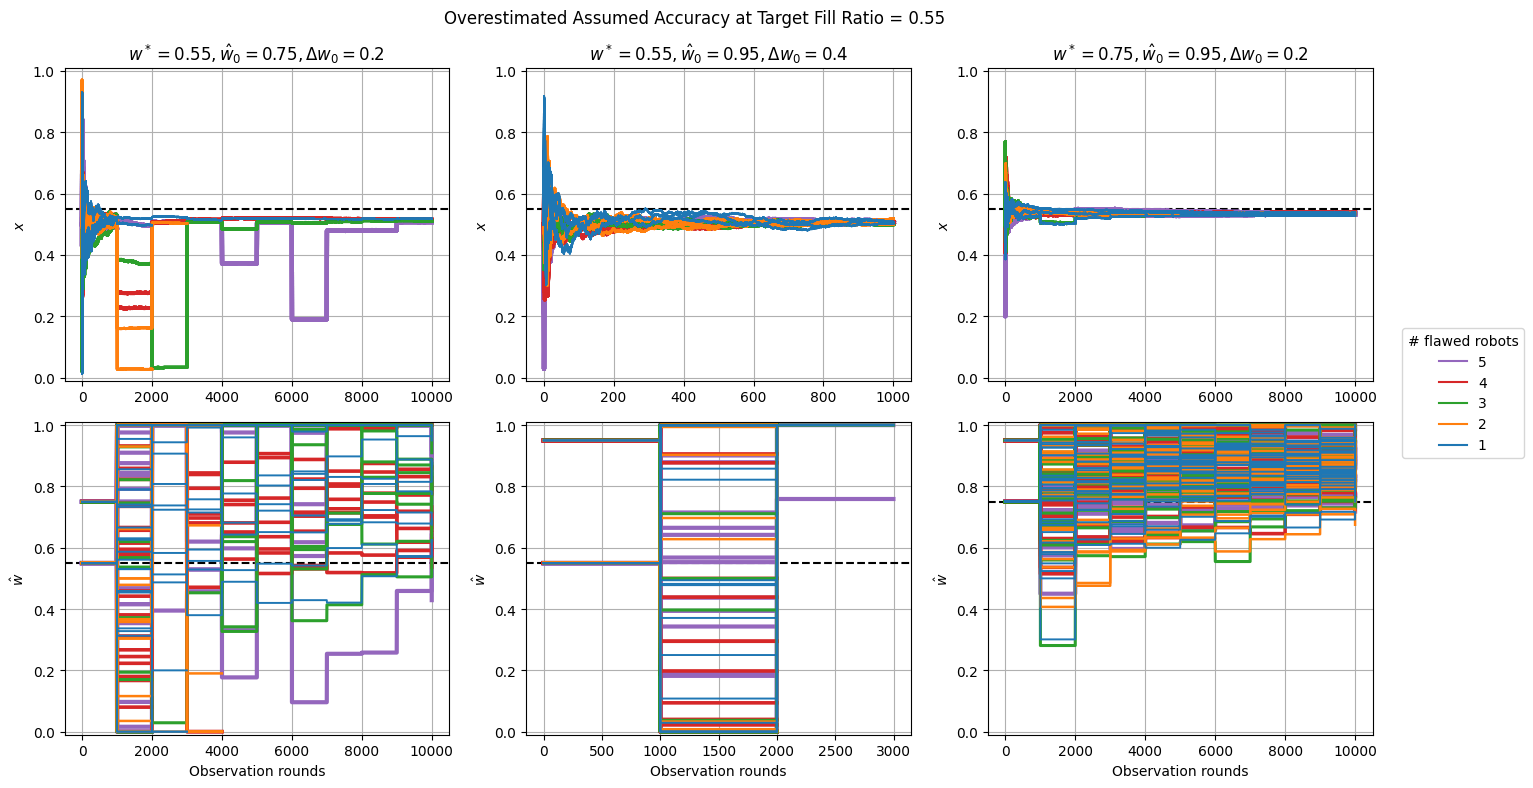

In [14]:
tfr = 0.55
plot_data(case2_over_tfr550_json_data, tfr, "Overestimated Assumed Accuracy at Target Fill Ratio = {0}".format(tfr))

Common parameter values:

num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.75
flawed_sensor_acc_b: 0.75
flawed_sensor_acc_w: 0.75
correct_sensor_acc_b: 0.55
correct_sensor_acc_w: 0.55
fully_connected: True
correct_robot_filter: True


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.75
flawed_sensor_acc_b: 0.95
flawed_sensor_acc_w: 0.95
correct_sensor_acc_b: 0.55
correct_sensor_acc_w: 0.55
fully_connected: True
correct_robot_filter: True


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.75
flawed_sensor_acc_b: 0.95
flawed_sensor_acc_w: 0.95
correct_sensor_acc_b: 0.75
correct_sensor_acc_w: 0.75
fully_connected: True
correct_robot_filter: True




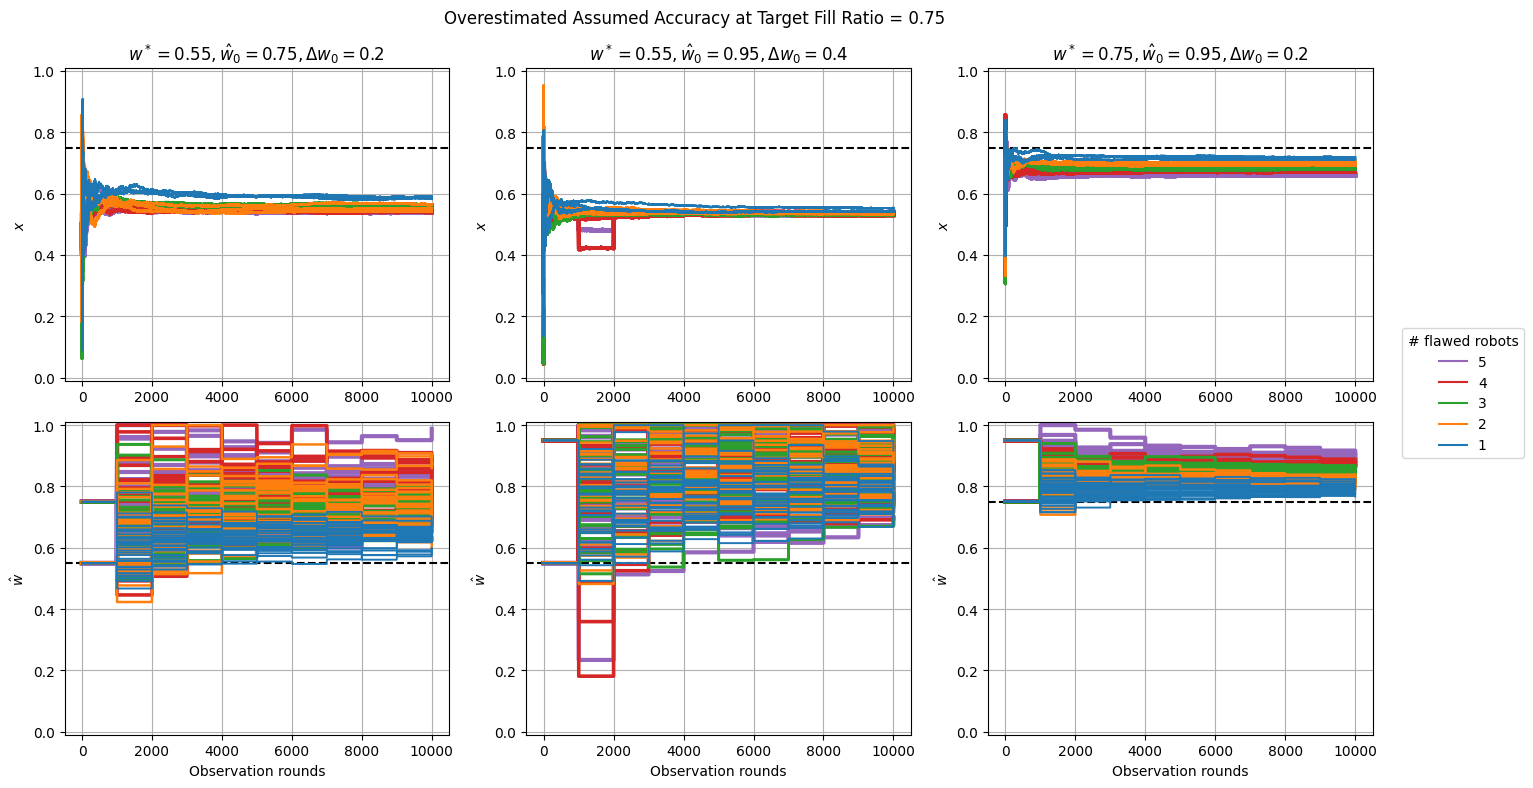

In [15]:
tfr = 0.75
plot_data(case2_over_tfr750_json_data, tfr, "Overestimated Assumed Accuracy at Target Fill Ratio = {0}".format(tfr))

Common parameter values:

num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.95
flawed_sensor_acc_b: 0.75
flawed_sensor_acc_w: 0.75
correct_sensor_acc_b: 0.55
correct_sensor_acc_w: 0.55
fully_connected: True
correct_robot_filter: True


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.95
flawed_sensor_acc_b: 0.95
flawed_sensor_acc_w: 0.95
correct_sensor_acc_b: 0.55
correct_sensor_acc_w: 0.55
fully_connected: True
correct_robot_filter: True


num_trials: 3
num_robots: 10
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.95
flawed_sensor_acc_b: 0.95
flawed_sensor_acc_w: 0.95
correct_sensor_acc_b: 0.75
correct_sensor_acc_w: 0.75
fully_connected: True
correct_robot_filter: True




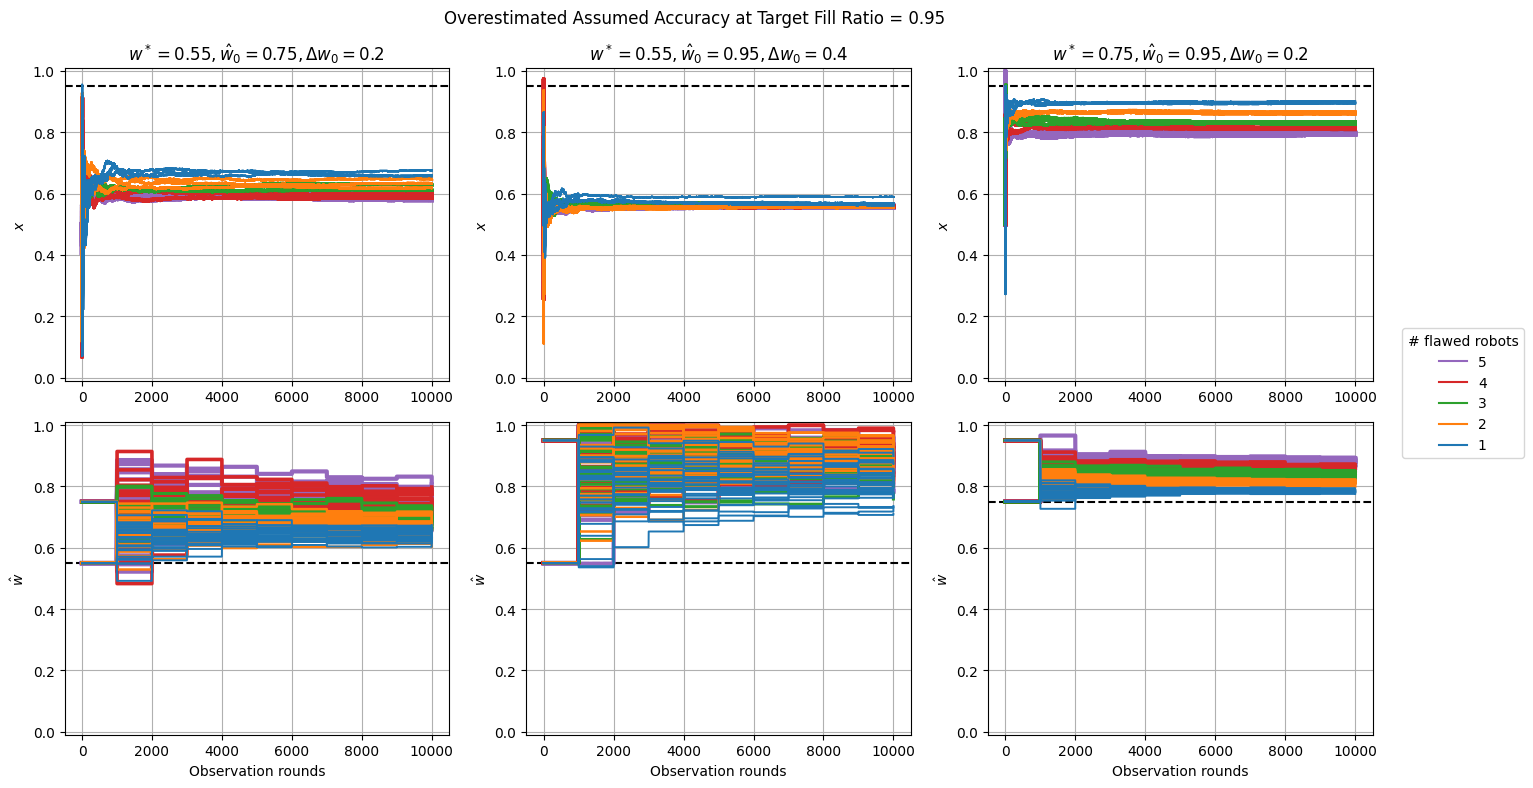

In [16]:
tfr = 0.95
plot_data(case2_over_tfr950_json_data, tfr, "Overestimated Assumed Accuracy at Target Fill Ratio = {0}".format(tfr))